In [1]:
library("phenopath")
library("reticulate")

In [9]:
library("ggplot2")

In [2]:
np <- import("numpy")

In [3]:
npzfile <- np$load('counts_100000.npz')
cell_log_counts <- npzfile[["cell_log_counts"]]
cell_init_vectors <- npzfile[["cell_init_vectors"]]

In [4]:
z_init = c(rep(1,100000), rep(2,100000), rep(3,100000), rep(4,100000), rep(5,100000))

## No Scaling, and Spoonfed Initial Z

In [5]:
time_start <- proc.time()
phenopath_results01 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=FALSE, z_init=z_init, elbo_tol=1, maxiter=100)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -10430552.0903097 	 Inf 
[ 2 ] 	 -8792414.91801731 	 18.6312541840531 
[ 3 ] 	 -7505734.50423678 	 17.1426315846136 
[ 4 ] 	 -6696829.69752249 	 12.0789215681197 
[ 5 ] 	 -6295618.66879484 	 6.37286102978745 
[ 6 ] 	 -6247204.7418085 	 0.774969430125052 


   user  system elapsed 
 50.187   2.611  43.493 

In [6]:
interaction_effects(phenopath_results01)

11.418838,-1.1061891,0.72286904,0.6127999,-0.3846458,-0.4057108,-0.32389179,-0.39808133,-0.39938573
3.652351,2.0386331,0.37000901,0.3470529,-0.3207031,-0.4321015,-0.37395786,-0.43976413,-0.44165377
3.866308,-1.1949474,3.50631674,0.7463778,-0.4510531,-0.4632034,-0.39549234,-0.44509850,-0.45761352
3.449242,-1.0171747,0.39912583,-4.6646364,-0.3376265,-0.4356819,-0.39502162,-0.42865031,-0.44212920
10.305098,-1.2129962,-0.08785786,0.7535327,-4.0927179,-0.3900235,-0.31578056,-0.37908329,-0.37671510
-4.758443,-0.6410014,-0.68662713,0.4453882,0.5599060,-2.6694352,0.03708009,0.04653925,0.04623131
-3.114494,-1.7233998,-1.17391638,0.5343405,0.2249124,0.1411336,-5.25425586,0.10249694,0.09658819
1.777374,-1.9052524,0.08470963,0.5501524,-0.2315914,-0.2873647,-0.25871791,-2.03762922,-0.29933490
-2.505605,-1.9717803,-1.14438915,0.4433219,0.3721055,0.2159446,0.17890448,0.17318864,-3.80726508


In [7]:
significant_interactions(phenopath_results01) * interaction_effects(phenopath_results01)

11.418838,-1.1061891,0.72286904,0.6127999,-0.3846458,-0.4057108,-0.32389179,-0.39808133,-0.39938573
3.652351,2.0386331,0.37000901,0.3470529,-0.3207031,-0.4321015,-0.37395786,-0.43976413,-0.44165377
3.866308,-1.1949474,3.50631674,0.7463778,-0.4510531,-0.4632034,-0.39549234,0.00000000,-0.45761352
3.449242,-1.0171747,0.39912583,-4.6646364,-0.3376265,-0.4356819,-0.39502162,-0.42865031,-0.44212920
10.305098,-1.2129962,-0.08785786,0.7535327,-4.0927179,-0.3900235,-0.31578056,-0.37908329,-0.37671510
-4.758443,-0.6410014,-0.68662713,0.4453882,0.5599060,-2.6694352,0.03708009,0.04653925,0.04623131
-3.114494,-1.7233998,-1.17391638,0.5343405,0.2249124,0.1411336,-5.25425586,0.10249694,0.09658819
1.777374,-1.9052524,0.08470963,0.5501524,-0.2315914,-0.2873647,-0.25871791,-2.03762922,-0.29933490
-2.505605,-1.9717803,-1.14438915,0.4433219,0.3721055,0.2159446,0.17890448,0.17318864,-3.80726508


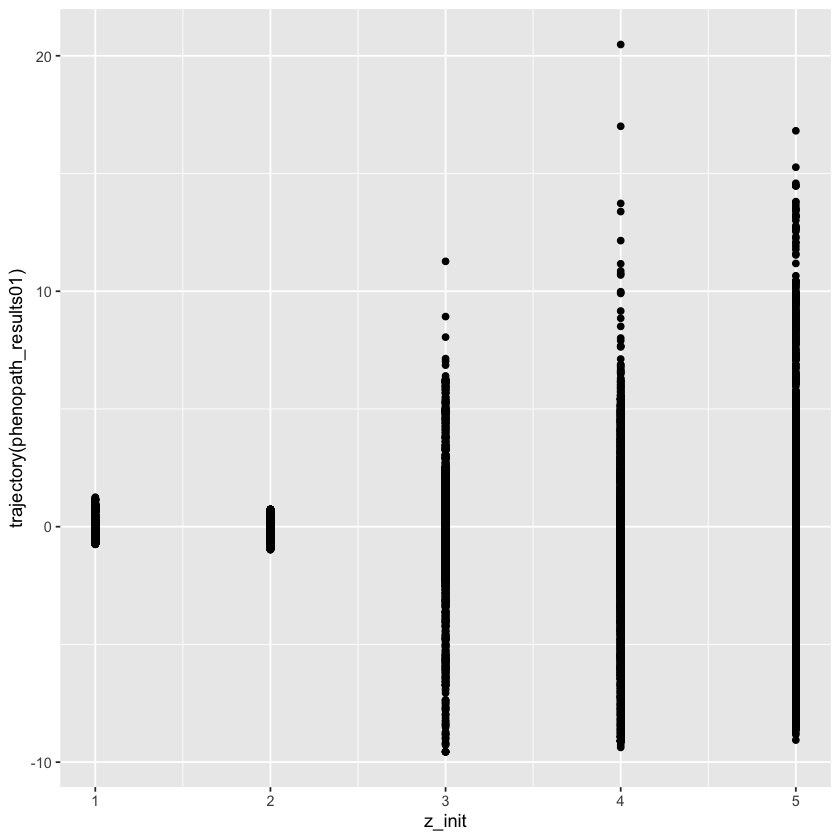

In [10]:
qplot(z_init, trajectory(phenopath_results01))

In [11]:
cor(z_init, trajectory(phenopath_results01))

[1] 0.1281453

still stinks but it is better than before

In [12]:
interaction_sds(phenopath_results01)

0.01686011,0.004191702,0.006971123,0.008425572,0.005440821,0.0005482415,0.0003750828,0.0004953165,0.0004880491
0.01213746,0.003017981,0.005019234,0.006066967,0.003917400,0.0003947082,0.0002700419,0.0003566046,0.0003513724
0.02042769,0.005079958,0.008449722,0.010210053,0.006593459,0.0006644313,0.0004545749,0.0006002899,0.0005914823
0.02674119,0.006650273,0.011056503,0.013371619,0.008630943,0.0008698794,0.0005951340,0.0007859051,0.0007743741
0.02505456,0.006228835,0.010355899,0.012517172,0.008086209,0.0008147312,0.0005574039,0.0007360806,0.0007252807
0.04190825,0.010424905,0.017325592,0.020925445,0.013526309,0.0013640140,0.0009331957,0.0012323303,0.0012142495
0.03595461,0.008949349,0.014877903,0.017968676,0.011610981,0.0011706192,0.0008008912,0.0010576135,0.0010420960
0.09531497,0.024129583,0.039846042,0.048046572,0.031204020,0.0031592599,0.0021614828,0.0028543788,0.0028124282
0.05357060,0.013368322,0.022208955,0.026792033,0.017332793,0.0017488930,0.0011965249,0.0015800660,0.0015569005


In [45]:
sum(interaction_sds(phenopath_results01))

[1] 0.8541223

## No Scaling, and No Spoonfed Initial Z

In [13]:
time_start <- proc.time()
phenopath_results00 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=FALSE, elbo_tol=1, maxiter=100)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -9086782.05036176 	 Inf 
[ 2 ] 	 -6065967.22221287 	 49.7993925368903 
[ 3 ] 	 -3960362.75210517 	 53.1669597434842 
[ 4 ] 	 -3231433.28227937 	 22.557466181435 
[ 5 ] 	 -2838697.2034946 	 13.8350817516318 
[ 6 ] 	 -2607789.97259688 	 8.85451793756933 
[ 7 ] 	 -2418421.8523836 	 7.83023524314559 
[ 8 ] 	 -2168070.83484204 	 11.5471788798731 
[ 9 ] 	 -1935635.06233715 	 12.0082435489795 
[ 10 ] 	 -1871638.90311322 	 3.41925780221192 
[ 11 ] 	 -1842299.44715078 	 1.59254544682243 
[ 12 ] 	 -1821911.86586089 	 1.11902126946496 
[ 13 ] 	 -1807426.59256636 	 0.801430794152859 


   user  system elapsed 
 98.999   5.792  95.324 

ok this leads to relatively an even better ELBO than last time wow huh

In [14]:
interaction_effects(phenopath_results00)

9.4874629,0.7527877,0.3524194,-0.5060787,-0.35547770,-2.857626e-05,0.0011763829,-1.939742e-05,-0.0003916630
-0.5754456,-1.4197574,-0.1573475,0.2209762,0.12525188,2.908422e-04,0.0001727165,1.096271e-04,-0.0006733564
-1.2485428,0.7671945,3.5254013,0.1833867,1.10735635,1.802002e-04,0.0056813401,4.638896e-05,-0.0001614393
-0.0536015,0.8705836,-0.1793280,4.0445060,0.10837296,2.535011e-04,0.0016924277,7.623769e-05,0.0003920749
0.6714609,0.2605913,-0.2058321,-0.1894542,-0.45607326,4.022409e-04,-0.0015403121,1.300714e-04,0.0002295176
-4.2321430,0.3558381,-1.1707123,-0.5655357,-0.15814919,-2.574905e+00,-0.0489842570,2.567859e-04,0.0054043011
-0.4323353,1.1168991,-0.8477486,-0.6481479,0.05065503,2.084722e-04,4.1993817116,6.135032e-05,-0.0060556806
-1.0035469,1.2110427,-0.3808659,-0.3015718,0.14000705,3.960106e-04,-0.0020805855,-5.166948e-01,0.0006981654
-0.5729540,1.7865650,-1.3239419,-1.2974747,-0.21829864,1.434905e-04,-0.1252527515,-4.980655e-05,-3.4403119720


In [15]:
significant_interactions(phenopath_results00) * interaction_effects(phenopath_results00)

9.4874629,0.7527877,0.3524194,-0.5060787,-0.3554777,-2.857626e-05,0.0011763829,-1.939742e-05,-0.0003916630
-0.5754456,-1.4197574,-0.1573475,0.2209762,0.1252519,2.908422e-04,0.0001727165,1.096271e-04,-0.0006733564
-1.2485428,0.7671945,3.5254013,0.1833867,1.1073563,1.802002e-04,0.0056813401,4.638896e-05,-0.0001614393
-0.0536015,0.8705836,-0.1793280,4.0445060,0.1083730,2.535011e-04,0.0016924277,7.623769e-05,0.0003920749
0.6714609,0.2605913,-0.2058321,-0.1894542,-0.4560733,4.022409e-04,-0.0015403121,1.300714e-04,0.0002295176
-4.2321430,0.3558381,-1.1707123,-0.5655357,-0.1581492,-2.574905e+00,-0.0489842570,2.567859e-04,0.0054043011
0.0000000,0.0000000,-0.8477486,0.0000000,0.0000000,2.084722e-04,4.1993817116,0.000000e+00,-0.0060556806
0.0000000,1.2110427,0.0000000,-0.3015718,0.1400071,3.960106e-04,0.0000000000,-5.166948e-01,0.0000000000
0.0000000,1.7865650,0.0000000,0.0000000,0.0000000,1.434905e-04,-0.1252527515,0.000000e+00,-3.4403119720


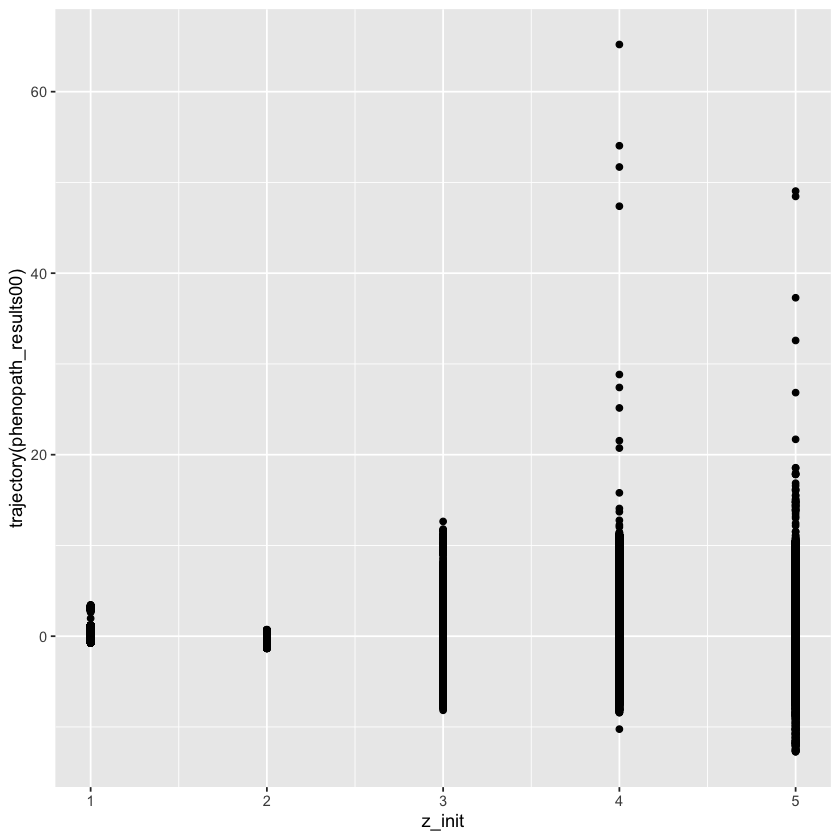

In [16]:
qplot(z_init, trajectory(phenopath_results00))

In [17]:
cor(z_init, trajectory(phenopath_results00))

[1] -0.1337006

yeah ok not much better than before huh

In [18]:
interaction_sds(phenopath_results00)

0.004547103,0.003000836,0.002759200,0.003493511,0.003931456,6.602338e-06,0.0004955500,1.586194e-05,0.0001664317
0.003231845,0.002132979,0.001961213,0.002483172,0.002794493,4.692795e-06,0.0003522261,1.127432e-05,0.0001182960
0.005370352,0.003544355,0.003259096,0.004126193,0.004643632,7.798278e-06,0.0005853130,1.873516e-05,0.0001965789
0.005260728,0.003472250,0.003192635,0.004042550,0.004548965,7.639596e-06,0.0005734029,1.835393e-05,0.0001925789
0.004712108,0.003109996,0.002859593,0.003620599,0.004074512,6.842593e-06,0.0005135827,1.643915e-05,0.0001724881
0.015936429,0.010513162,0.009669102,0.012237866,0.013768010,2.314245e-05,0.0017369719,5.559914e-05,0.0005833739
0.011990553,0.007917161,0.007279642,0.009215660,0.010369090,1.742194e-05,0.0013076345,4.185576e-05,0.0004391718
0.011703059,0.007725662,0.007103090,0.008992191,0.010118369,1.700013e-05,0.0012759649,4.084236e-05,0.0004285388
0.019285049,0.012744569,0.011717722,0.014832878,0.016679223,2.804832e-05,0.0021051694,6.738535e-05,0.0007070417


In [46]:
sum(interaction_sds(phenopath_results00))

[1] 0.328155

## Scaling, and Spoonfed Initial Z

In [19]:
time_start <- proc.time()
phenopath_results11 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=TRUE, z_init=z_init, elbo_tol=1, maxiter=100)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -9332315.80505774 	 Inf 
[ 2 ] 	 -7408520.70204191 	 25.9673311365061 
[ 3 ] 	 -6343202.90967083 	 16.7946352582684 
[ 4 ] 	 -6027664.13259702 	 5.23484338431216 
[ 5 ] 	 -5827214.02580785 	 3.43989607900799 
[ 6 ] 	 -5920332.44966419 	 1.57285802187717 
[ 7 ] 	 -5881339.03054235 	 0.663002403353074 


   user  system elapsed 
 55.608   3.596  51.463 

In [20]:
interaction_effects(phenopath_results11)

3.0231965,-2.1922108,0.7175477,1.0874796,-1.4085020,-0.44481380,0.071377557,-0.5481231,-0.35997536
2.1092488,-1.7283261,0.4895508,0.7961005,-0.9049021,-0.28495026,-0.010290674,-0.3946445,-0.26907171
1.7299108,-0.8213109,1.3531813,0.6578760,-0.5874708,-0.19590440,0.010919330,-0.2704954,-0.19522248
15.4691728,-12.9444792,2.6143871,5.8068651,-8.2968935,-3.23315606,-1.274866764,-2.9972001,-4.30404622
38.5776193,-32.3023350,3.5402450,13.9380690,-25.4275432,-7.04581536,0.244892948,-7.3957723,-5.98278523
0.8592233,-0.6772481,-0.1186704,0.3246365,-0.4888820,-6.53662994,-0.007352383,-0.1672345,-0.11271500
0.6786905,-0.5765981,-0.2593487,0.3594775,-0.5897796,-0.14937943,-7.438916069,-0.2047893,-0.12951315
0.6823126,-0.2349527,0.1861721,0.2880793,-0.2456104,-0.06875173,0.041862286,5.7044654,-0.07649999
-2.4062468,2.1571432,-0.6945228,-0.9126855,1.2617825,0.53894055,0.251408941,0.4419293,-6.12945646


In [21]:
significant_interactions(phenopath_results11) * interaction_effects(phenopath_results11)

3.0231965,-2.1922108,0.7175477,1.0874796,-1.4085020,-0.44481380,0.071377557,-0.5481231,-0.35997536
2.1092488,-1.7283261,0.4895508,0.7961005,-0.9049021,-0.28495026,-0.010290674,-0.3946445,-0.26907171
1.7299108,-0.8213109,1.3531813,0.6578760,-0.5874708,-0.19590440,0.010919330,-0.2704954,-0.19522248
15.4691728,-12.9444792,2.6143871,5.8068651,-8.2968935,-3.23315606,-1.274866764,-2.9972001,-4.30404622
38.5776193,-32.3023350,3.5402450,13.9380690,-25.4275432,-7.04581536,0.244892948,-7.3957723,-5.98278523
0.8592233,-0.6772481,-0.1186704,0.3246365,-0.4888820,-6.53662994,-0.007352383,-0.1672345,-0.11271500
0.6786905,-0.5765981,-0.2593487,0.3594775,-0.5897796,0.00000000,-7.438916069,-0.2047893,-0.12951315
0.6823126,-0.2349527,0.1861721,0.2880793,-0.2456104,-0.06875173,0.041862286,5.7044654,-0.07649999
-2.4062468,2.1571432,-0.6945228,-0.9126855,1.2617825,0.53894055,0.251408941,0.4419293,-6.12945646


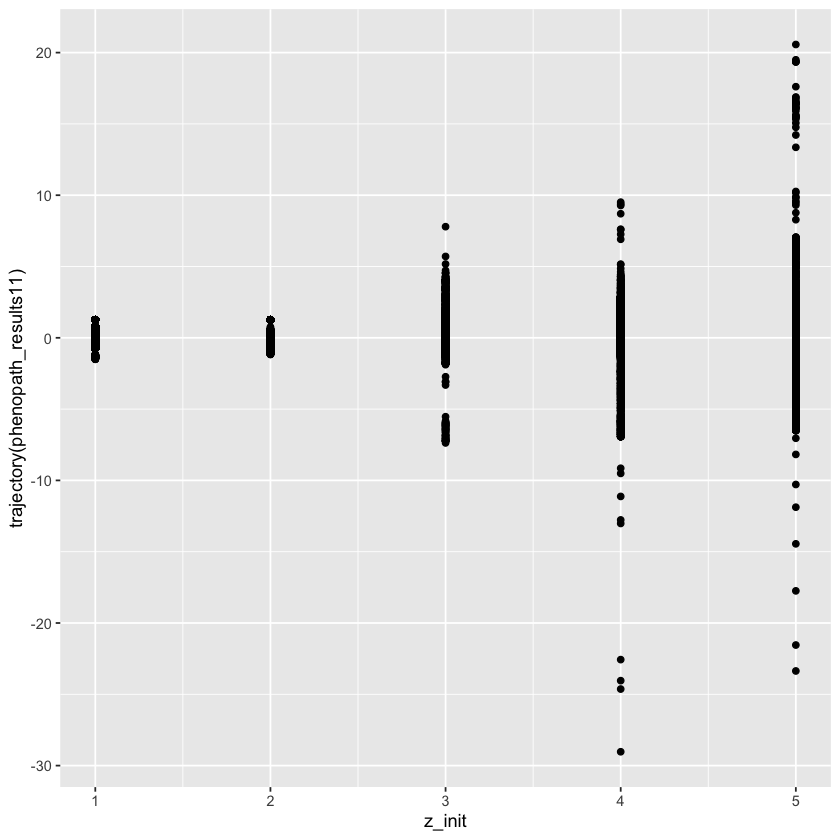

In [22]:
qplot(z_init, trajectory(phenopath_results11))

In [23]:
cor(z_init, trajectory(phenopath_results11))

[1] 0.2692783

huh dang it's noticeably better this time? huh

In [24]:
interaction_sds(phenopath_results11)

0.005501133,0.004517309,0.003013830,0.004275659,0.003254320,0.001626149,0.001735085,0.0011282898,0.0005968517
0.004790539,0.003933834,0.002624484,0.003723338,0.002833940,0.001416071,0.001510934,0.0009825272,0.0005197444
0.005257936,0.004317590,0.002880566,0.004086595,0.003110423,0.001554226,0.001658343,0.0010783856,0.0005704527
0.033759172,0.027721944,0.018488829,0.026236094,0.019970433,0.009978271,0.010642767,0.0069236769,0.0036626530
0.041168818,0.033806459,0.022543179,0.031995230,0.024354088,0.012168467,0.012974274,0.0084432653,0.0044664242
0.018132162,0.014892194,0.009936946,0.014091995,0.010730746,0.005364211,0.005722631,0.0037216539,0.0019687994
0.015418365,0.012664140,0.008450748,0.011985801,0.009125429,0.004560803,0.004866841,0.0031646315,0.0016741048
0.017311979,0.014219203,0.009491241,0.013459761,0.010248124,0.005122676,0.005465750,0.0035547743,0.0018803968
0.012697972,0.010427382,0.006956464,0.009867896,0.007511938,0.003753862,0.004005275,0.0026046526,0.0013778671


In [47]:
sum(interaction_sds(phenopath_results11))

[1] 0.9475995

## Scaling, and No Spoonfed Initial Z

In [25]:
time_start <- proc.time()
phenopath_results10 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=TRUE, elbo_tol=1, maxiter=100)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -6887351.20587467 	 Inf 
[ 2 ] 	 -4138323.37216884 	 66.4285408963851 
[ 3 ] 	 -2039601.47422242 	 102.898626249843 
[ 4 ] 	 -1208875.31314209 	 68.7189284162922 
[ 5 ] 	 -730262.349643676 	 65.5398657389283 
[ 6 ] 	 -538114.672784359 	 35.7075706308267 
[ 7 ] 	 -460357.186054308 	 16.8906859902646 
[ 8 ] 	 -420311.487406171 	 9.52762411878573 
[ 9 ] 	 -408699.130641827 	 2.84129715326461 
[ 10 ] 	 -424776.531596945 	 3.78490800672888 
[ 11 ] 	 -458649.06095376 	 7.38528261376509 
[ 12 ] 	 -499211.991823086 	 8.12539192441932 
[ 13 ] 	 -539262.299716288 	 7.42686961693267 
[ 14 ] 	 -575137.475229207 	 6.23766961083915 
[ 15 ] 	 -605524.229540523 	 5.0182557243619 
[ 16 ] 	 -630415.42651607 	 3.94838005679943 
[ 17 ] 	 -650375.498093405 	 3.06900730975379 
[ 18 ] 	 -666084.524448683 	 2.35841335126057 
[ 19 ] 	 -678120.909310022 	 1.77496147015815 
[ 20 ] 	 -686919.663147502 	 1.28089998139863 
[ 21 ] 	 -692816.085315441 	 0.851080437206414 


   user  system elapsed 
149.041   9.929 149.317 

ok dang wow smallest ELBO by far so far huh

In [26]:
interaction_effects(phenopath_results10)

2.04537641,-0.1426873,0.21963029,-0.22876904,-0.52682512,-0.077982700,-0.023224261,-0.0223636588,-0.0005699495
-0.02889699,-0.6386107,-0.06939572,0.11101980,0.03053427,0.012188449,0.004841469,0.0040815300,-0.0042258260
-0.05024320,0.1699952,0.80849050,0.09025030,0.07030432,0.008921464,0.013557439,0.0027562589,-0.0017142472
-0.03829698,0.3770588,-0.11050098,1.69221322,0.01107496,0.001665423,0.007135202,0.0005576015,0.0005501613
1.22827281,0.5553999,0.18038910,0.22062907,0.01911335,0.137773034,0.093372174,0.0404319514,-0.0085046182
-1.25035817,0.2261652,-0.37009055,-0.23769080,0.15259700,-3.887664649,-0.051831382,0.0027805829,-0.0004668406
-0.20666192,0.4661907,-0.18244958,-0.25290403,0.07326201,-0.003637892,3.874013180,-0.0010318869,-0.0171758146
-0.22960403,0.3718998,-0.14429668,-0.07704772,-0.01715961,0.011245542,0.002820874,-6.9218608853,0.0031083869
-0.26516993,0.6828911,-0.30602865,-0.45913086,0.01578729,-0.005173408,-0.098965369,-0.0017488988,-4.7509934654


In [27]:
significant_interactions(phenopath_results10) * interaction_effects(phenopath_results10)

2.04537641,-0.1426873,0.21963029,-0.22876904,-0.52682512,-0.077982700,-0.023224261,-0.0223636588,-0.0005699495
-0.02889699,-0.6386107,-0.06939572,0.11101980,0.03053427,0.012188449,0.004841469,0.0040815300,-0.0042258260
-0.05024320,0.1699952,0.80849050,0.09025030,0.07030432,0.008921464,0.013557439,0.0027562589,-0.0017142472
-0.03829698,0.3770588,-0.11050098,1.69221322,0.01107496,0.001665423,0.007135202,0.0005576015,0.0005501613
1.22827281,0.5553999,0.18038910,0.22062907,0.01911335,0.137773034,0.093372174,0.0000000000,-0.0085046182
-1.25035817,0.2261652,-0.37009055,-0.23769080,0.15259700,-3.887664649,-0.051831382,0.0027805829,-0.0004668406
-0.20666192,0.4661907,-0.18244958,-0.25290403,0.07326201,-0.003637892,3.874013180,0.0000000000,-0.0171758146
-0.22960403,0.3718998,-0.14429668,-0.07704772,-0.01715961,0.011245542,0.002820874,-6.9218608853,0.0031083869
0.00000000,0.6828911,-0.30602865,0.00000000,0.01578729,0.000000000,-0.098965369,0.0000000000,-4.7509934654


this one is probably the most reasonable yet? (and corresponds to default settings, huh, cough cough, hint hint)

well to be fair to myself it's also the slowest so you know

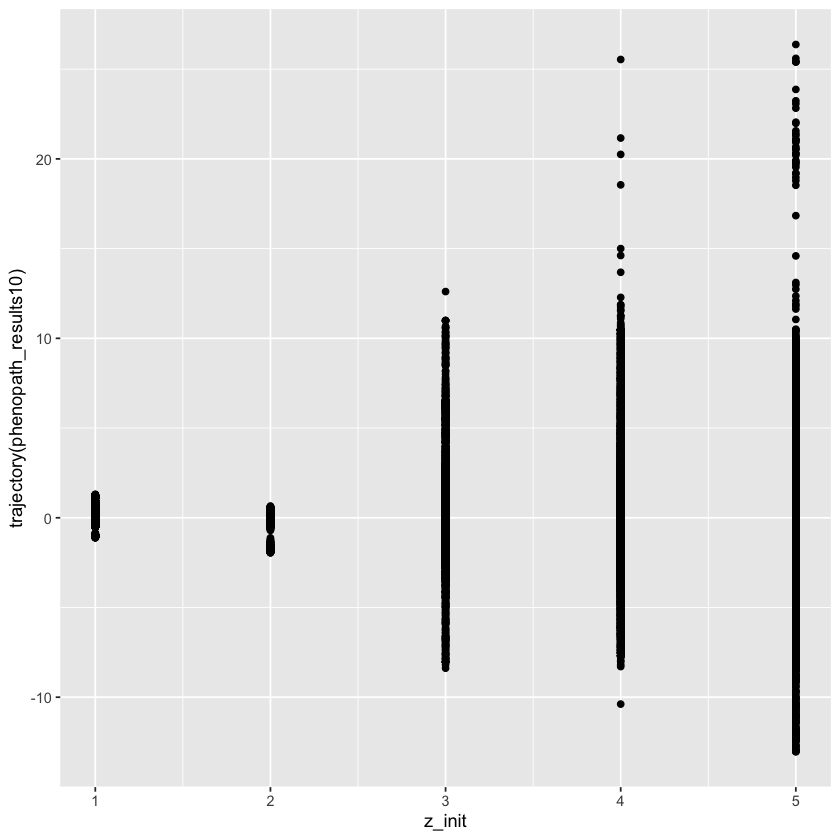

In [28]:
qplot(z_init, trajectory(phenopath_results10))

In [29]:
cor(z_init, trajectory(phenopath_results10))

[1] -0.1238188

ok no better than the first two and worse than the third

In [30]:
interaction_sds(phenopath_results10)

0.0018907960,0.0017456889,0.002883118,0.0019560144,0.002874811,1.429508e-04,0.0009547525,3.488336e-05,0.0005616480
0.0008269696,0.0007635129,0.001261017,0.0008555051,0.001257379,6.252165e-05,0.0004175767,1.525675e-05,0.0002456453
0.0013987669,0.0012914347,0.002132926,0.0014470323,0.002126758,1.057521e-04,0.0007063081,2.580600e-05,0.0004154961
0.0012961325,0.0011966760,0.001976414,0.0013408639,0.001970711,9.799244e-05,0.0006544821,2.391246e-05,0.0003850086
0.0025709196,0.0023736266,0.003920094,0.0026595895,0.003908778,1.943732e-04,0.0012981919,4.743164e-05,0.0007636835
0.0033417917,0.0030853113,0.005095328,0.0034570085,0.005080589,2.526580e-04,0.0016874575,6.165449e-05,0.0009926797
0.0026461802,0.0024431445,0.004034895,0.0027374845,0.004023248,2.000665e-04,0.0013362265,4.882092e-05,0.0007860519
0.0066430710,0.0061335683,0.010126726,0.0068721505,0.010097477,5.023491e-04,0.0033549552,1.225851e-04,0.0019736746
0.0030146670,0.0027833730,0.004596710,0.0031186921,0.004583424,2.279285e-04,0.0015222979,5.561992e-05,0.0008955231


In [48]:
sum(interaction_sds(phenopath_results10))

[1] 0.1653314

OK so even with the one converging in the smallest number of steps, it was only 6 steps

so setting `thin=2` would probably be OK, I think

actually maybe `thin=3` would be OK too. but yeah don't want to send `thin` too high and then accidentally have it do too many iterations you know

i mean given the problem size and what it says in the documentation it seems that maybe the thing to be truly concerned about is the ELBOs more than unnecessary iterations but yeah I don't know

## Scaling, and No Spoonfed Initial Z -- Reduced ELBOs

In [31]:
time_start <- proc.time()
phenopath_results10 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=TRUE, elbo_tol=1, maxiter=100, thin=3)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 3 ] 	 -2039601.47422242 	 Inf 
[ 6 ] 	 -538114.672784359 	 93.009097464235 
[ 9 ] 	 -408699.130641827 	 10.5550784949714 
[ 12 ] 	 -499211.991823086 	 6.04371574026179 
[ 15 ] 	 -605524.229540523 	 5.85235253085894 
[ 18 ] 	 -666084.524448683 	 3.03066115912169 
[ 21 ] 	 -692816.085315441 	 1.28613068861736 
[ 24 ] 	 -695986.033558687 	 0.151820491140119 


   user  system elapsed 
149.306  10.979 150.638 

huh well that didn't seem to speed things up at all?

ugh worst part is that it also kept going after making the ELBO worse too blegh, in addition to adding 3 more iterations

## Scaling, and Spoonfed Initial Z -- Reduced ELBOs

In [32]:
time_start <- proc.time()
phenopath_results11 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=TRUE, z_init=z_init, elbo_tol=1, maxiter=100, thin=3)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 3 ] 	 -6343202.90967083 	 Inf 
[ 6 ] 	 -5920332.44966419 	 2.38089366096677 
[ 9 ] 	 -5866657.06651575 	 0.304974266945532 


   user  system elapsed 
 61.390   4.756  57.655 

yeah this is actually slower haha

## No Scaling, and No Spoonfed Initial Z -- Reduced ELBOs

In [33]:
time_start <- proc.time()
phenopath_results00 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=FALSE, elbo_tol=1, maxiter=100, thin=3)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 3 ] 	 -3960362.75210517 	 Inf 
[ 6 ] 	 -2607789.97259688 	 17.2888767081369 
[ 9 ] 	 -1935635.06233715 	 11.5750970372853 
[ 12 ] 	 -1821911.86586089 	 2.08065674685311 
[ 15 ] 	 -1789196.95306576 	 0.609489688266275 


   user  system elapsed 
 96.318   7.166  93.899 

yeah this didn't speed things up either and added some iterations

although the extra iterations did improve the ELBO somewhat so huh idk

ok actually it sped things up by literally a second and that's it, it seems? huh

## No Scaling, and Spoonfed Initial Z -- Reduced ELBOs

In [34]:
time_start <- proc.time()
phenopath_results01 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=FALSE, z_init=z_init, elbo_tol=1, maxiter=100, thin=3)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 3 ] 	 -7505734.50423678 	 Inf 
[ 6 ] 	 -6247204.7418085 	 6.71516203081865 
[ 9 ] 	 -6062709.63828594 	 1.01437099102509 
[ 12 ] 	 -6023926.37027479 	 0.214606806409664 


   user  system elapsed 
104.434   6.860 115.199 

ook wow this is much slower than before -- what?

## Reduce ELBOs?

seems like it's a no, usually didn't actually speed anything up, at least with small number of iterations you get when using `elbo_tol=1`

## No Scaling, and Spoonfed Initial Z -- ELBOs in 2's instead of 3's? maybe that will not be bad?

In [36]:
time_start <- proc.time()
phenopath_results01 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=FALSE, z_init=z_init, elbo_tol=1, maxiter=100, thin=2)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 2 ] 	 -8792414.91801731 	 Inf 
[ 4 ] 	 -6696829.69752249 	 15.6460990882753 
[ 6 ] 	 -6247204.7418085 	 3.59860909235885 
[ 8 ] 	 -6105995.85167319 	 1.15631334810538 
[ 10 ] 	 -6036342.34273165 	 0.576951280980647 


   user  system elapsed 
 93.231   6.509 104.334 

oof, nope, still much worse than `thin=1`

In [37]:
time_start <- proc.time()
phenopath_results01 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=FALSE, z_init=z_init, elbo_tol=1, maxiter=100, thin=1)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -10430552.0903097 	 Inf 
[ 2 ] 	 -8792414.91801731 	 18.6312541840531 
[ 3 ] 	 -7505734.50423678 	 17.1426315846136 
[ 4 ] 	 -6696829.69752249 	 12.0789215681197 
[ 5 ] 	 -6295618.66879484 	 6.37286102978745 
[ 6 ] 	 -6247204.7418085 	 0.774969430125052 


   user  system elapsed 
 57.653   3.221  57.852 

huh seems like I got lucky first time then? still the the `thin=n`'s for `n > 1` appear to either be substantially slower or make no difference

In [38]:
time_start <- proc.time()
phenopath_results01 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=FALSE, z_init=z_init, elbo_tol=1, maxiter=100, thin=1)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -10430552.0903097 	 Inf 
[ 2 ] 	 -8792414.91801731 	 18.6312541840531 
[ 3 ] 	 -7505734.50423678 	 17.1426315846136 
[ 4 ] 	 -6696829.69752249 	 12.0789215681197 
[ 5 ] 	 -6295618.66879484 	 6.37286102978745 
[ 6 ] 	 -6247204.7418085 	 0.774969430125052 


   user  system elapsed 
 63.400   4.570  66.674 

yeah definitely seems like I got lucky the first time -- oh well

anyway no reducing ELBOs for now at least

## All Phenopath defaults (except the convergence things)

i.e. this is same as scale True, z init false, 10

except that model_mu is now turned off, since that is also phenopath default

since it seems so far that phenopath defaults get better ELBOs, you know?

In [39]:
time_start <- proc.time()
phenopath_results_defaults <- phenopath(cell_log_counts, cell_init_vectors, elbo_tol=1, maxiter=100)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -6887277.92984103 	 Inf 
[ 2 ] 	 -4266437.95102653 	 61.4292299313509 
[ 3 ] 	 -2319426.6136577 	 83.943649085686 
[ 4 ] 	 -1735454.16365272 	 33.6495461669733 
[ 5 ] 	 -1570337.98941311 	 10.5146901719751 
[ 6 ] 	 -1490790.34923137 	 5.33593742559103 
[ 7 ] 	 -1399780.23590653 	 6.50174298724125 
[ 8 ] 	 -1285275.36117774 	 8.90897609862048 
[ 9 ] 	 -1176206.63656171 	 9.27292205516378 
[ 10 ] 	 -1099578.6586457 	 6.96884914176032 
[ 11 ] 	 -1054018.38717489 	 4.32253099425795 
[ 12 ] 	 -1025761.96066787 	 2.75467677594739 
[ 13 ] 	 -1004475.93902944 	 2.1191171247965 
[ 14 ] 	 -986099.478298357 	 1.86355039582728 
[ 15 ] 	 -969526.113237163 	 1.70942946609831 
[ 16 ] 	 -954728.8639823 	 1.54989021628007 
[ 17 ] 	 -941901.865093209 	 1.36181903491839 
[ 18 ] 	 -931000.205382779 	 1.17096211659243 
[ 19 ] 	 -921695.718973567 	 1.00949654182767 
[ 20 ] 	 -913584.527102441 	 0.887842518179636 


   user  system elapsed 
139.038   8.995 139.558 

HAHA, modeling mu _is_ the right choice -- worse ELBO than defaults without mmodeling mu! haha 
ok anyway good because this will mean fewer options for me to check or whatever you know

also similarly slow compared to the defaults with mu so yeah definitely no speed advantage or anything similar

In [40]:
interaction_effects(phenopath_results_defaults)

1.450774160,0.33869793,0.275734542,-0.13023687,-0.11934617,0.029242184,0.013808565,0.010554291,-0.0017321019
0.074920729,-0.47071543,0.125440797,0.16666997,0.09245834,0.034167721,0.015865632,0.012475658,-0.0035978039
-0.084987104,0.26328843,1.303216924,0.11955918,0.43711523,0.022223936,0.018559670,0.007962803,-0.0010031984
0.073489820,0.34141975,-0.004203270,1.48205978,0.05243735,0.015235937,0.010517189,0.005601339,0.0005213623
0.215426237,0.07034324,-0.001384314,-0.02998809,-0.02737606,0.013369252,0.004479881,0.005030823,0.0011782915
-0.521723403,0.18474301,-0.314699139,-0.19963196,-0.02094931,-3.919293930,-0.032471500,0.006212677,-0.0057015660
-0.003295541,0.46632066,-0.209333460,-0.24272747,0.04990406,0.012307901,3.864782315,0.004950978,-0.0194827162
-0.021939360,0.43231226,-0.004041882,-0.07175923,0.07034910,0.041285222,0.018088046,-6.912401027,0.0026421467
-0.074201541,0.63579039,-0.394530274,-0.44454612,-0.04232776,0.009467406,-0.081964510,0.003517476,-4.5925794030


In [41]:
significant_interactions(phenopath_results_defaults) * interaction_effects(phenopath_results_defaults)

1.450774160,0.33869793,0.275734542,-0.13023687,-0.11934617,0.029242184,0.000000000,0.010554291,-0.0017321019
0.074920729,-0.47071543,0.125440797,0.16666997,0.09245834,0.034167721,0.015865632,0.012475658,-0.0035978039
-0.084987104,0.26328843,1.303216924,0.11955918,0.00000000,0.022223936,0.018559670,0.000000000,-0.0010031984
0.073489820,0.34141975,-0.004203270,1.48205978,0.05243735,0.015235937,0.010517189,0.005601339,0.0005213623
0.215426237,0.07034324,-0.001384314,-0.02998809,-0.02737606,0.013369252,0.004479881,0.005030823,0.0011782915
-0.521723403,0.18474301,-0.314699139,-0.19963196,-0.02094931,-3.919293930,-0.032471500,0.006212677,-0.0057015660
-0.003295541,0.46632066,-0.209333460,-0.24272747,0.04990406,0.012307901,3.864782315,0.004950978,-0.0194827162
-0.021939360,0.43231226,-0.004041882,-0.07175923,0.07034910,0.041285222,0.018088046,-6.912401027,0.0026421467
-0.074201541,0.63579039,0.000000000,0.00000000,-0.04232776,0.009467406,-0.081964510,0.000000000,-4.5925794030


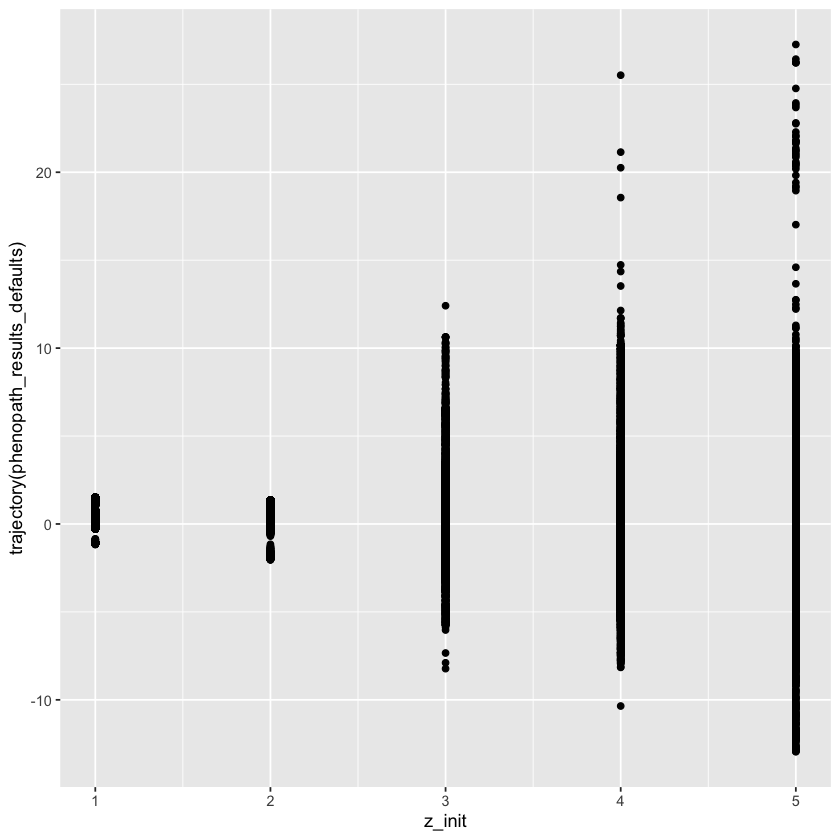

In [42]:
qplot(z_init, trajectory(phenopath_results_defaults))

In [43]:
cor(z_init, trajectory(phenopath_results_defaults))

[1] 0.03043836

probably the weakest of them all so far dang

In [44]:
interaction_sds(phenopath_results_defaults)

0.0006386468,0.0009338462,0.0011322636,0.0011687518,0.001444684,8.641817e-05,0.0004752222,2.546648e-05,0.0002827314
0.0005025389,0.0007348272,0.0008909588,0.0009196711,0.001136799,6.800082e-05,0.0003739435,2.003909e-05,0.0002224760
0.0007708427,0.0011271465,0.0013666394,0.0014106744,0.001743721,1.043064e-04,0.0005735911,3.073795e-05,0.0003412556
0.0007765078,0.0011354303,0.0013766770,0.0014210495,0.001756534,1.050730e-04,0.0005778066,3.096385e-05,0.0003437636
0.0007208645,0.0010540672,0.0012780276,0.0013192132,0.001630666,9.754357e-05,0.0005364018,2.874501e-05,0.0003191299
0.0022345273,0.0032672909,0.0039614187,0.0040890505,0.005054215,3.023706e-04,0.0016627442,8.910527e-05,0.0009892509
0.0017353140,0.0025373931,0.0030764722,0.0031756073,0.003925239,2.348165e-04,0.0012912804,6.919786e-05,0.0007682394
0.0043998109,0.0064329157,0.0077988147,0.0080499820,0.009948766,5.954170e-04,0.0032740837,1.754631e-04,0.0019479710
0.0019285164,0.0028198939,0.0034189773,0.0035291500,0.004362191,2.609609e-04,0.0014350372,7.690233e-05,0.0008537774


In [49]:
sum(interaction_sds(phenopath_results_defaults))

[1] 0.1328068

smallest sum of SD's so far observed, but compared with the others that maybe is a bad thing?

since ones with better ELBO's seem to have larger SD sums, at least so it seems to me, honestly I don't really know though so yeah

## Centering but not scaling, model intercepts, no z init

don't get why scaling improves performance, that seems like it would be the signal we want to identify/understand

In [50]:
time_start <- proc.time()
# https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/scale
centered_cell_log_counts <- scale(cell_log_counts, center=TRUE, scale=FALSE)
phenopath_results_center_no_scale <- phenopath(centered_cell_log_counts, cell_init_vectors, 
                                               model_mu=TRUE, elbo_tol=1, maxiter=100,
                                              scale_y=FALSE) # scale_y just does scale(y, center=TRUE, scale=TRUE)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -9077894.0649315 	 Inf 
[ 2 ] 	 -6088466.73900025 	 49.0998383350308 
[ 3 ] 	 -3997162.14164602 	 52.3197339323602 
[ 4 ] 	 -3285271.57455062 	 21.6691543131492 
[ 5 ] 	 -2967218.99581259 	 10.7188778174739 
[ 6 ] 	 -2792890.42516893 	 6.24186932192714 
[ 7 ] 	 -2684597.51627141 	 4.03386013140341 
[ 8 ] 	 -2606606.95297267 	 2.99203388565353 
[ 9 ] 	 -2557348.87612232 	 1.92613832669719 
[ 10 ] 	 -2528425.2545152 	 1.14393817082258 
[ 11 ] 	 -2510733.86181345 	 0.704630346163835 


   user  system elapsed 
 84.826   5.372  80.668 

huh yeah the ELBO is not as good as what you get when you center and scale

In [54]:
interaction_effects(phenopath_results_center_no_scale)

8.6453324,0.5786401,0.05133811,-0.60337719,-1.19463595,-0.0086872342,-0.006607030,-9.654058e-04,3.437631e-04
-0.7431309,-1.2174466,-0.09737737,0.28086040,0.11033894,0.0048413741,0.002760380,6.713014e-04,-6.420472e-04
-2.0702130,0.7911968,3.37463522,0.09783493,0.87567911,-0.0012868884,0.003173194,-7.161085e-05,4.320914e-04
-0.3623608,0.9212927,-0.19078603,3.95401038,0.01532979,0.0005160027,0.000956255,1.440243e-04,8.009843e-04
1.7916003,0.7585241,0.29833034,-0.07097549,1.17791632,0.0194034033,0.012599702,2.352984e-03,8.320381e-05
-4.1188654,0.4759176,-1.06691511,-0.55954135,-0.15103445,-2.5323320109,-0.040244493,3.255317e-05,-2.817623e-03
-0.5054707,1.0814653,-0.86328534,-0.70308952,-0.05734390,-0.0015697333,4.227569201,-3.389363e-05,-4.979485e-03
-1.3497317,1.2874095,-0.40163050,-0.37224610,-0.02134313,0.0033042181,-0.003016345,-5.162256e-01,1.342703e-03
-0.5369049,1.7523370,-1.30925335,-1.33853332,-0.27789515,0.0003591802,-0.138240545,-3.272078e-05,-3.352176e+00


In [55]:
significant_interactions(phenopath_results_center_no_scale) * interaction_effects(phenopath_results_center_no_scale)

8.6453324,0.5786401,0.05133811,-0.60337719,-1.19463595,-0.0086872342,-0.006607030,-9.654058e-04,3.437631e-04
-0.7431309,-1.2174466,-0.09737737,0.28086040,0.11033894,0.0048413741,0.002760380,6.713014e-04,-6.420472e-04
-2.0702130,0.7911968,3.37463522,0.09783493,0.87567911,-0.0012868884,0.003173194,-7.161085e-05,4.320914e-04
-0.3623608,0.9212927,-0.19078603,3.95401038,0.01532979,0.0005160027,0.000956255,1.440243e-04,8.009843e-04
1.7916003,0.7585241,0.29833034,-0.07097549,1.17791632,0.0194034033,0.012599702,0.000000e+00,8.320381e-05
-4.1188654,0.4759176,-1.06691511,-0.55954135,-0.15103445,-2.5323320109,-0.040244493,3.255317e-05,0.000000e+00
-0.5054707,1.0814653,-0.86328534,0.00000000,-0.05734390,-0.0015697333,4.227569201,0.000000e+00,-4.979485e-03
-1.3497317,1.2874095,-0.40163050,-0.37224610,-0.02134313,0.0000000000,0.000000000,-5.162256e-01,0.000000e+00
0.0000000,1.7523370,0.00000000,-1.33853332,0.00000000,0.0003591802,-0.138240545,-3.272078e-05,-3.352176e+00


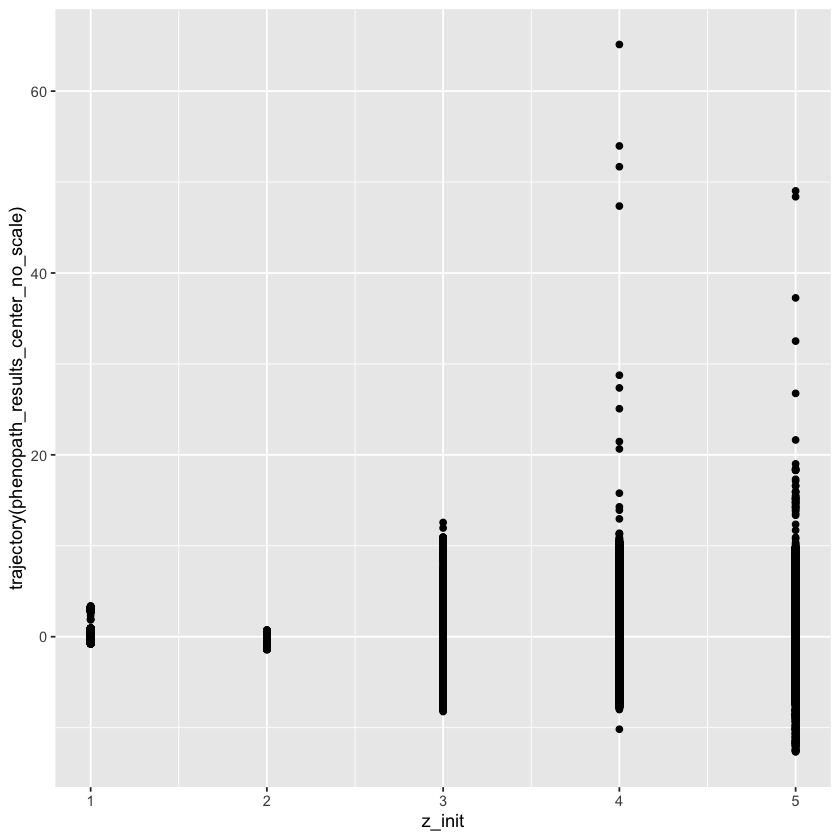

In [56]:
qplot(z_init, trajectory(phenopath_results_center_no_scale))

In [57]:
cor(z_init, trajectory(phenopath_results_center_no_scale))

[1] -0.1125248

yeah not that fantastic either, but better than the complete defaults I guess idk

In [58]:
interaction_sds(phenopath_results_center_no_scale)

0.005124185,0.003244138,0.002587994,0.003461382,0.003896773,5.148388e-05,0.0004998290,9.327108e-06,0.0001347362
0.003832995,0.002426876,0.001936002,0.002589366,0.002915030,3.851297e-05,0.0003739017,6.977225e-06,0.0001007906
0.005844821,0.003700518,0.002952174,0.003948237,0.004444889,5.872699e-05,0.0005701481,1.063931e-05,0.0001536918
0.005946106,0.003765072,0.003003550,0.004017394,0.004522268,5.975134e-05,0.0005800930,1.082489e-05,0.0001563726
0.006072288,0.003844630,0.003067039,0.004101999,0.004618036,6.101445e-05,0.0005923557,1.105372e-05,0.0001596782
0.017846413,0.011294256,0.009012809,0.012049981,0.013561607,1.793375e-04,0.0017410649,3.248979e-05,0.0004693359
0.013727792,0.008696661,0.006938109,0.009278114,0.010442880,1.380427e-04,0.0013401824,2.500860e-05,0.0003612655
0.013277655,0.008408279,0.006707492,0.008969727,0.010096468,1.334587e-04,0.0012956678,2.417812e-05,0.0003492687
0.021265470,0.013486060,0.010758873,0.014386621,0.016183797,2.140925e-04,0.0020784638,3.878620e-05,0.0005602922


In [59]:
sum(interaction_sds(phenopath_results_center_no_scale))

[1] 0.3448737

well anyway it does seem that scaling improves performance, w.r.t. ELBO and absolute value of correlation

## Centering but not scaling, model intercepts, no z init

don't get why scaling improves performance, that seems like it would be the signal we want to identify/understand

In [50]:
time_start <- proc.time()
# https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/scale
centered_cell_log_counts <- scale(cell_log_counts, center=TRUE, scale=FALSE)
phenopath_results_center_no_scale <- phenopath(centered_cell_log_counts, cell_init_vectors, 
                                               model_mu=TRUE, elbo_tol=1, maxiter=100,
                                              scale_y=FALSE) # scale_y just does scale(y, center=TRUE, scale=TRUE)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -9077894.0649315 	 Inf 
[ 2 ] 	 -6088466.73900025 	 49.0998383350308 
[ 3 ] 	 -3997162.14164602 	 52.3197339323602 
[ 4 ] 	 -3285271.57455062 	 21.6691543131492 
[ 5 ] 	 -2967218.99581259 	 10.7188778174739 
[ 6 ] 	 -2792890.42516893 	 6.24186932192714 
[ 7 ] 	 -2684597.51627141 	 4.03386013140341 
[ 8 ] 	 -2606606.95297267 	 2.99203388565353 
[ 9 ] 	 -2557348.87612232 	 1.92613832669719 
[ 10 ] 	 -2528425.2545152 	 1.14393817082258 
[ 11 ] 	 -2510733.86181345 	 0.704630346163835 


   user  system elapsed 
 84.826   5.372  80.668 

huh yeah the ELBO is not as good as what you get when you center and scale

In [54]:
interaction_effects(phenopath_results_center_no_scale)

8.6453324,0.5786401,0.05133811,-0.60337719,-1.19463595,-0.0086872342,-0.006607030,-9.654058e-04,3.437631e-04
-0.7431309,-1.2174466,-0.09737737,0.28086040,0.11033894,0.0048413741,0.002760380,6.713014e-04,-6.420472e-04
-2.0702130,0.7911968,3.37463522,0.09783493,0.87567911,-0.0012868884,0.003173194,-7.161085e-05,4.320914e-04
-0.3623608,0.9212927,-0.19078603,3.95401038,0.01532979,0.0005160027,0.000956255,1.440243e-04,8.009843e-04
1.7916003,0.7585241,0.29833034,-0.07097549,1.17791632,0.0194034033,0.012599702,2.352984e-03,8.320381e-05
-4.1188654,0.4759176,-1.06691511,-0.55954135,-0.15103445,-2.5323320109,-0.040244493,3.255317e-05,-2.817623e-03
-0.5054707,1.0814653,-0.86328534,-0.70308952,-0.05734390,-0.0015697333,4.227569201,-3.389363e-05,-4.979485e-03
-1.3497317,1.2874095,-0.40163050,-0.37224610,-0.02134313,0.0033042181,-0.003016345,-5.162256e-01,1.342703e-03
-0.5369049,1.7523370,-1.30925335,-1.33853332,-0.27789515,0.0003591802,-0.138240545,-3.272078e-05,-3.352176e+00


In [55]:
significant_interactions(phenopath_results_center_no_scale) * interaction_effects(phenopath_results_center_no_scale)

8.6453324,0.5786401,0.05133811,-0.60337719,-1.19463595,-0.0086872342,-0.006607030,-9.654058e-04,3.437631e-04
-0.7431309,-1.2174466,-0.09737737,0.28086040,0.11033894,0.0048413741,0.002760380,6.713014e-04,-6.420472e-04
-2.0702130,0.7911968,3.37463522,0.09783493,0.87567911,-0.0012868884,0.003173194,-7.161085e-05,4.320914e-04
-0.3623608,0.9212927,-0.19078603,3.95401038,0.01532979,0.0005160027,0.000956255,1.440243e-04,8.009843e-04
1.7916003,0.7585241,0.29833034,-0.07097549,1.17791632,0.0194034033,0.012599702,0.000000e+00,8.320381e-05
-4.1188654,0.4759176,-1.06691511,-0.55954135,-0.15103445,-2.5323320109,-0.040244493,3.255317e-05,0.000000e+00
-0.5054707,1.0814653,-0.86328534,0.00000000,-0.05734390,-0.0015697333,4.227569201,0.000000e+00,-4.979485e-03
-1.3497317,1.2874095,-0.40163050,-0.37224610,-0.02134313,0.0000000000,0.000000000,-5.162256e-01,0.000000e+00
0.0000000,1.7523370,0.00000000,-1.33853332,0.00000000,0.0003591802,-0.138240545,-3.272078e-05,-3.352176e+00


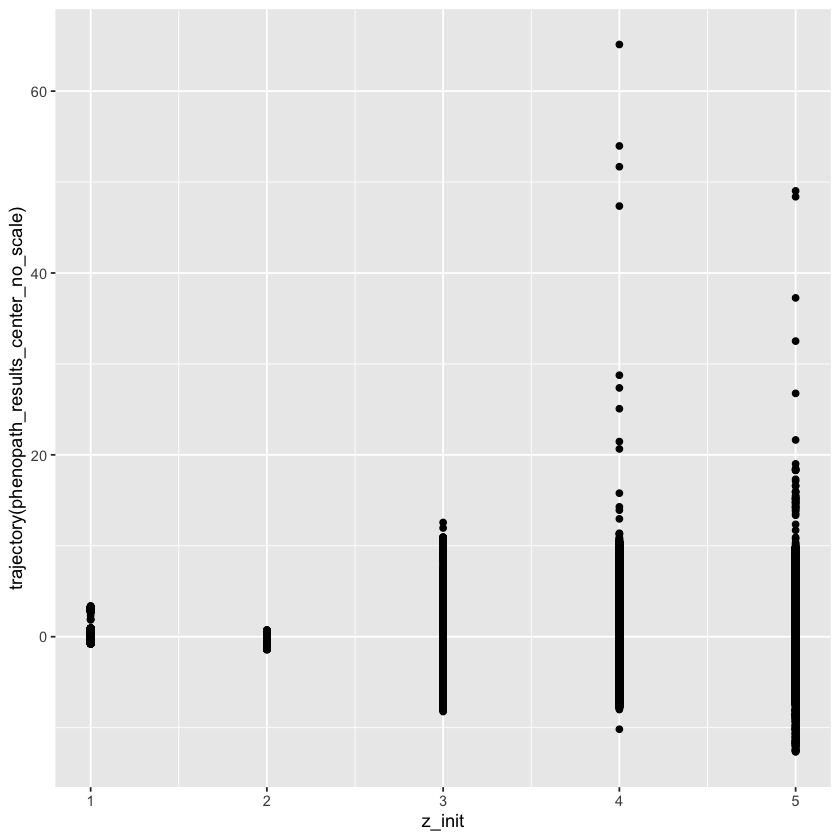

In [56]:
qplot(z_init, trajectory(phenopath_results_center_no_scale))

In [57]:
cor(z_init, trajectory(phenopath_results_center_no_scale))

[1] -0.1125248

yeah not that fantastic either, but better than the complete defaults I guess idk

In [58]:
interaction_sds(phenopath_results_center_no_scale)

0.005124185,0.003244138,0.002587994,0.003461382,0.003896773,5.148388e-05,0.0004998290,9.327108e-06,0.0001347362
0.003832995,0.002426876,0.001936002,0.002589366,0.002915030,3.851297e-05,0.0003739017,6.977225e-06,0.0001007906
0.005844821,0.003700518,0.002952174,0.003948237,0.004444889,5.872699e-05,0.0005701481,1.063931e-05,0.0001536918
0.005946106,0.003765072,0.003003550,0.004017394,0.004522268,5.975134e-05,0.0005800930,1.082489e-05,0.0001563726
0.006072288,0.003844630,0.003067039,0.004101999,0.004618036,6.101445e-05,0.0005923557,1.105372e-05,0.0001596782
0.017846413,0.011294256,0.009012809,0.012049981,0.013561607,1.793375e-04,0.0017410649,3.248979e-05,0.0004693359
0.013727792,0.008696661,0.006938109,0.009278114,0.010442880,1.380427e-04,0.0013401824,2.500860e-05,0.0003612655
0.013277655,0.008408279,0.006707492,0.008969727,0.010096468,1.334587e-04,0.0012956678,2.417812e-05,0.0003492687
0.021265470,0.013486060,0.010758873,0.014386621,0.016183797,2.140925e-04,0.0020784638,3.878620e-05,0.0005602922


In [59]:
sum(interaction_sds(phenopath_results_center_no_scale))

[1] 0.3448737

## To Scale or Not to Scale?

i mean first it is the default setting, and that is probably for a good reason

i think the intuition about the not misattributing "intrinsic variation" to "interaction variation" seems fairly convincing, although I worry about the biased observations thing, but at the end of the day I don't really know how phenopath works and how it works might inherently obviate that worry, i.e. it how it interprets covariates for scaled data vs unscaled, I don't know, you know

but anyway considering the best result in terms of absolute value of correlation was scaled (scale + spoonfed z) and the best result in terms of ELBO was also scaled (scale + no spoonfed z) I'm going to go out on a limb here and say that we should just scale it for all things. 

Like that would give us 4 variations, censoring vs not censoring "insignificant" values, and spoonfeeding vs not spoonfeeding z

and like we know the true value of time here, so I think it makes sense to consider what happens if anything to improve estimation accuracy by spoonfeeding, or at least if it doesn't help to convince people that it doesn't help and that the pseudotime approach of ignoring time is OK/justified by working well in practice. or at least convincing myself

so yeah definitely use `model_mu=TRUE`, and again for reasons above `scale_y=TRUE` (especially since I wouldn't have even known that it existed as an option if I hadn't been over-scrutinizing the documentation).